# Telecom Customer Churn Prediction	
### A Model that will predict whether a customer will churn or not based on some given inputs (features)

## 1. Data Loading
Here I am loading data from a csv file through Pandas library.

In [88]:
# Import some basic libraries for data science
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as ml
from sklearn.model_selection import train_test_split



In [89]:
# Loading the CSV dataset into code
customer_df = pd.read_csv("/Users/haseebsagheer/Documents/Python Learning/Customer-Churn/Datasets/WA_Fn-UseC_-Telco-Customer-Churn 3.csv")
# Setting the view limit of columns to max
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

# Need to check the header values
print(customer_df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes  

## 2. Data Understanding
Understanding the data through some useful funtions in Python, so i can get a quick overview of data such as describe(), info() etc.

In [90]:
customer_df.shape

(7043, 21)

In [91]:
customer_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [92]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [94]:
customer_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 2.1 Initial Data Visualization
Doing some intial visualization between some features and churn

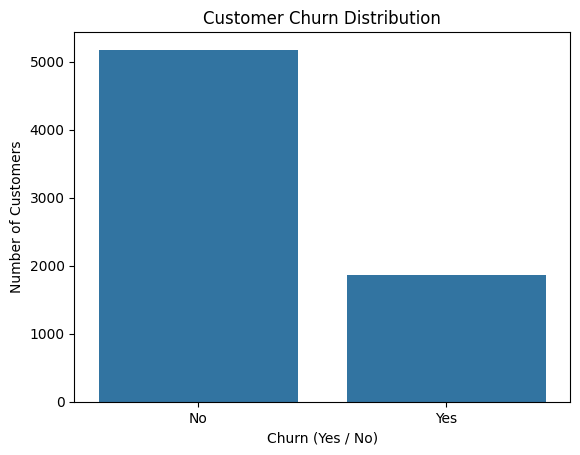

In [95]:
sb.countplot(x="Churn", data=customer_df)
ml.title("Customer Churn Distribution")
ml.xlabel("Churn (Yes / No)")
ml.ylabel("Number of Customers")
ml.show()


### 70% of the users have not churned yet, and 30% have already done so.

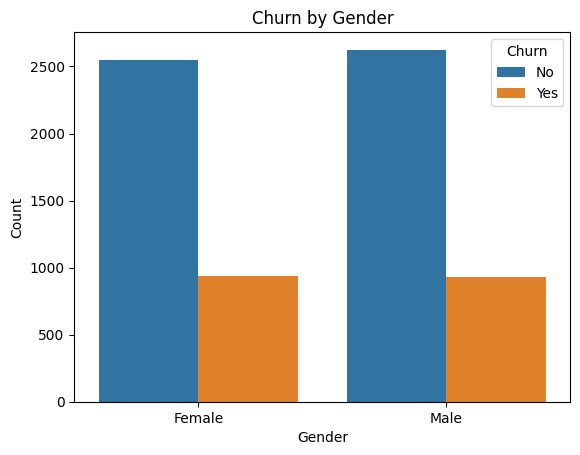

In [96]:
sb.countplot(data=customer_df, x="gender", hue="Churn")
ml.title("Churn by Gender")
ml.xlabel("Gender")
ml.ylabel("Count")
ml.show()


### Outcome 
1. Customer Churn is not significantly impacted by gender. The number of female customers who churned is very similar to the number of male customers who churned.
2. The majority of customers, for both genders, have not churned. The blue bars for both females and males are significantly taller than their corresponding orange bars.
3. The total number of male and female customers is nearly equal. The combined height of the "No" and "Yes" bars for females is very close to the combined height for males.

Text(0.5, 1.0, 'Churn by Contract Type')

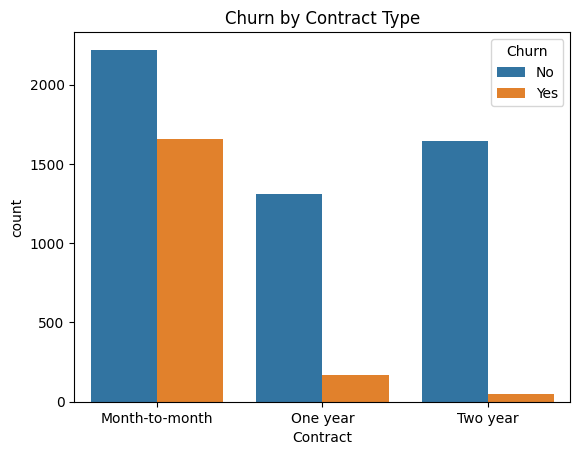

In [97]:
sb.countplot(data=customer_df,x="Contract",hue="Churn")
ml.title("Churn by Contract Type")


### Contract type is a strong predictor of churn

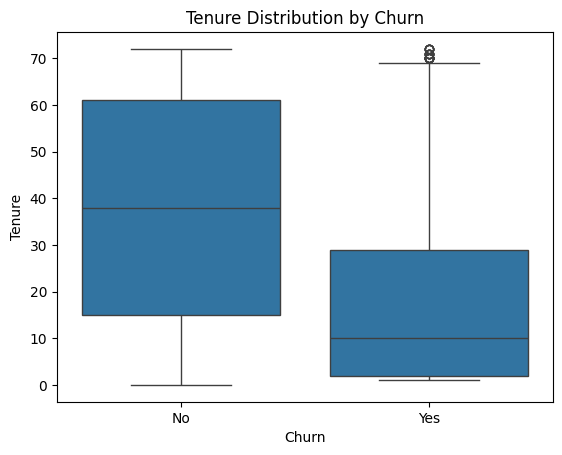

In [98]:
sb.boxplot(data=customer_df, x="Churn", y="tenure")
ml.title("Tenure Distribution by Churn")
ml.xlabel("Churn")
ml.ylabel("Tenure")
ml.show()


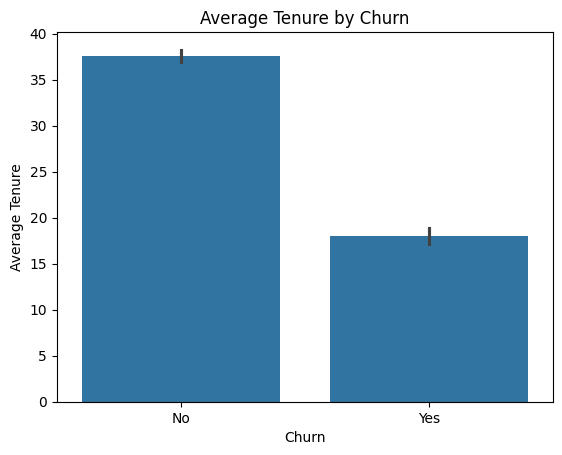

In [99]:
sb.barplot(data=customer_df, x="Churn", y="tenure", estimator="mean")
ml.title("Average Tenure by Churn")
ml.xlabel("Churn")
ml.ylabel("Average Tenure")
ml.show()


In [129]:
output_file = "distinct_values.txt"

# Open the file in write mode
with open(output_file, "w", encoding="utf-8") as f:
    for col in customer_df.columns:
        f.write(f"Column: {col}\n")
        unique_vals = customer_df[col].unique().tolist()
        f.write(f"{unique_vals}\n\n")  # Write the values
        f.write("-" * 50 + "\n\n")     # Separator for readability

print(f"Distinct values have been saved to {output_file}")

Distinct values have been saved to distinct_values.txt


## 3. Data Preprocessing (Missing Values, Removing Extra Feature etc)

In [101]:
customer_df.drop("customerID",axis= 1,inplace=True)
customer_df.drop("gender",axis = 1, inplace=True)


In [102]:
customer_df["Partner"].value_counts()
def binary_encoding(column):
    if column.nunique() != 2:
        print("Unable to convert to binary")
        return column
    mapping = {"Yes":1,"No":0}
    return column.replace(mapping).astype(int)


In [103]:
customer_df["Partner"] = binary_encoding(customer_df["Partner"])
customer_df["Dependents"] = binary_encoding(customer_df["Dependents"])
customer_df["PhoneService"] = binary_encoding(customer_df["PhoneService"])
customer_df["PaperlessBilling"] = binary_encoding(customer_df["PaperlessBilling"])
customer_df["Churn"] = binary_encoding(customer_df["Churn"])


/var/folders/8n/ybp5gv0n715b8994769t9_f00000gn/T/ipykernel_23273/1509126610.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return column.replace(mapping).astype(int)
/var/folders/8n/ybp5gv0n715b8994769t9_f00000gn/T/ipykernel_23273/1509126610.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return column.replace(mapping).astype(int)
/var/folders/8n/ybp5gv0n715b8994769t9_f00000gn/T/ipykernel_23273/1509126610.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retai

In [104]:
customer_df= pd.get_dummies(data=customer_df,columns=["MultipleLines"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["InternetService"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["OnlineSecurity"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["OnlineBackup"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["DeviceProtection"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["TechSupport"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["StreamingTV"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["StreamingMovies"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["Contract"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["PaperlessBilling"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["PaymentMethod"],drop_first=True)
customer_df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,0,0,34,1,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,0,0,45,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,0,0,2,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [105]:

pd.set_option("display.width",None)
pd.set_option("display.max_rows",None)
pd.set_option("display.max_row",None)
customer_df = customer_df[pd.to_numeric(customer_df["TotalCharges"], errors="coerce").notnull()]
customer_df["TotalCharges"] = pd.to_numeric(customer_df["TotalCharges"], errors="coerce")




## 4. Modeling Prepration

In [106]:
X = customer_df.drop("Churn",axis = 1)
Y = customer_df["Churn"]

In [107]:
X_train, X_test,Y_train,y_test = train_test_split(X,Y,test_size=20,stratify=Y,random_state=42)


In [108]:
print(Y.value_counts(normalize=True))        # original distribution
print(Y_train.value_counts(normalize=True))  # training set
print(Y_test.value_counts(normalize=True))   # test set


Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64
Churn
0    0.73417
1    0.26583
Name: proportion, dtype: float64
Churn
0    0.75
1    0.25
Name: proportion, dtype: float64


## 5. Modeling Training

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.57      0.80      0.67         5

    accuracy                           0.80        20
   macro avg       0.75      0.80      0.76        20
weighted avg       0.84      0.80      0.81        20



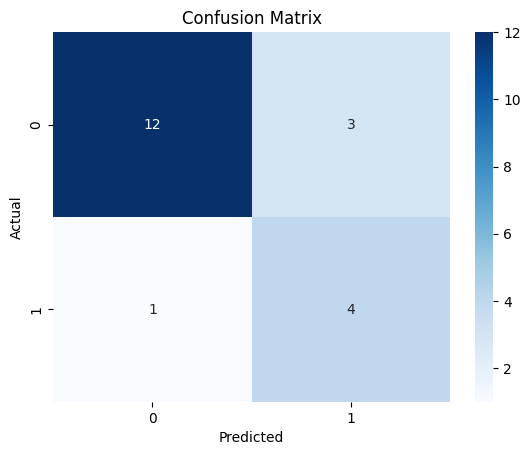

In [110]:
model = LogisticRegression(max_iter=1000, solver='liblinear')  # You can try 'lbfgs' too
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)                       # 0 or 1
y_proba = model.predict_proba(X_test)[:, 1]          # Probability of class = 1 (Churn)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
ml.title("Confusion Matrix")
ml.xlabel("Predicted")
ml.ylabel("Actual")
ml.show()



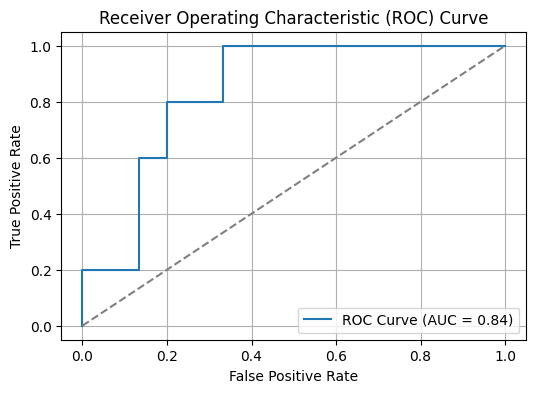

In [111]:
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)
roc_auc = roc_auc_score(Y_test, y_proba)

ml.figure(figsize=(6, 4))
ml.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
ml.plot([0, 1], [0, 1], linestyle="--", color="gray")
ml.xlabel("False Positive Rate")
ml.ylabel("True Positive Rate")
ml.title("Receiver Operating Characteristic (ROC) Curve")
ml.legend(loc="lower right")
ml.grid()

ml.savefig("roc_curve.png", dpi=300, bbox_inches='tight') 
ml.show()


## 📊 Model Evaluation Summary (Logistic Regression)

Our baseline Logistic Regression model achieved strong performance. Here's a summary of its evaluation:

### ✅ Accuracy
- **Accuracy:** `0.80`
- This means the model correctly predicted churn or no-churn for 80% of the customers.

### ✅ Classification Report
| Metric     | Class 0 (Not Churned) | Class 1 (Churned) |
|------------|------------------------|--------------------|
| Precision  | 0.92                   | 0.57               |
| Recall     | 0.80                   | 0.80               |
| F1-score   | 0.86                   | 0.67               |
| Support    | 15                     | 5                  |

**Interpretation:**
- The model is very good at correctly identifying customers who won’t churn (class 0).
- It correctly identifies 80% of actual churners (high **recall**), but with some false positives (lower **precision** for class 1).
- Overall, **F1-score of 0.67** for churners is a solid starting point.

---

### 📈 ROC Curve and AUC Score

The ROC (Receiver Operating Characteristic) curve helps us understand how well the model separates churn vs. non-churn across all thresholds.

- **AUC (Area Under Curve):** `0.84`
- This means there's an **84% chance** the model ranks a random churner higher than a non-churner.

<img src="roc_curve.png" alt="ROC Curve" width="400"/>


**Conclusion:**  
The steep rise in the ROC curve and the high AUC score demonstrate that our model is capable of distinguishing between churn and non-churn customers effectively.

---



## 🌲 Random Forest Classifier - Model Training

Random Forest is an ensemble method that builds multiple decision trees and combines their outputs to improve predictive performance and reduce overfitting.

In this step, we:

- Trained a Random Forest model using the processed churn dataset
- Used `X_train` and `y_train` to fit the model
- Will evaluate performance on `X_test` and `y_test` using accuracy, precision, recall, F1-score, and AUC

Benefits of Random Forest:
- Handles non-linear relationships well
- Automatically manages feature interactions
- Less sensitive to outliers and noise


## 🔧 Random Forest Tuning - First Attempt

We tuned the following hyperparameters:

- `n_estimators=200`: More trees for better generalization
- `max_depth=8`: Prevents overly deep trees and overfitting
- `min_samples_split=5` and `min_samples_leaf=2`: Smoother splits
- `class_weight='balanced'`: Handles class imbalance for better recall

This configuration aims to improve prediction of minority class (churners).


Confusion Matrix:
[[11  4]
 [ 0  5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.56      1.00      0.71         5

    accuracy                           0.80        20
   macro avg       0.78      0.87      0.78        20
weighted avg       0.89      0.80      0.81        20



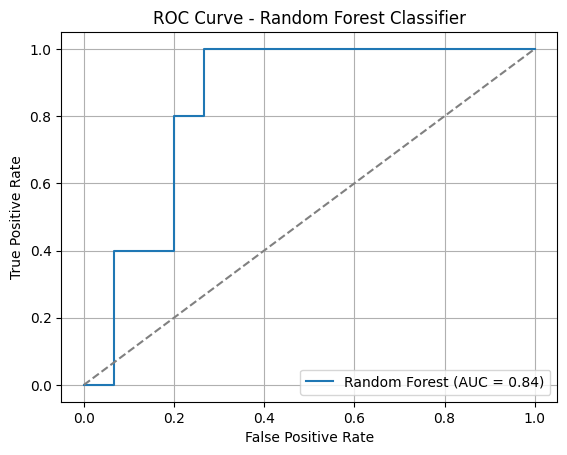

In [112]:
from sklearn.ensemble import RandomForestClassifier
# 1. Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)


# 2. Train the model
rf_model.fit(X_train, Y_train)

# 3. Predict
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # for ROC AUC

# 4. Evaluate
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

# 5. ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_prob)
auc_score = roc_auc_score(Y_test, y_prob)

ml.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})")
ml.plot([0, 1], [0, 1], linestyle="--", color="gray")
ml.xlabel("False Positive Rate")
ml.ylabel("True Positive Rate")
ml.title("ROC Curve - Random Forest Classifier")
ml.legend()
ml.grid()
ml.savefig("random_forest_roc.png", dpi=300, bbox_inches='tight')
ml.show()

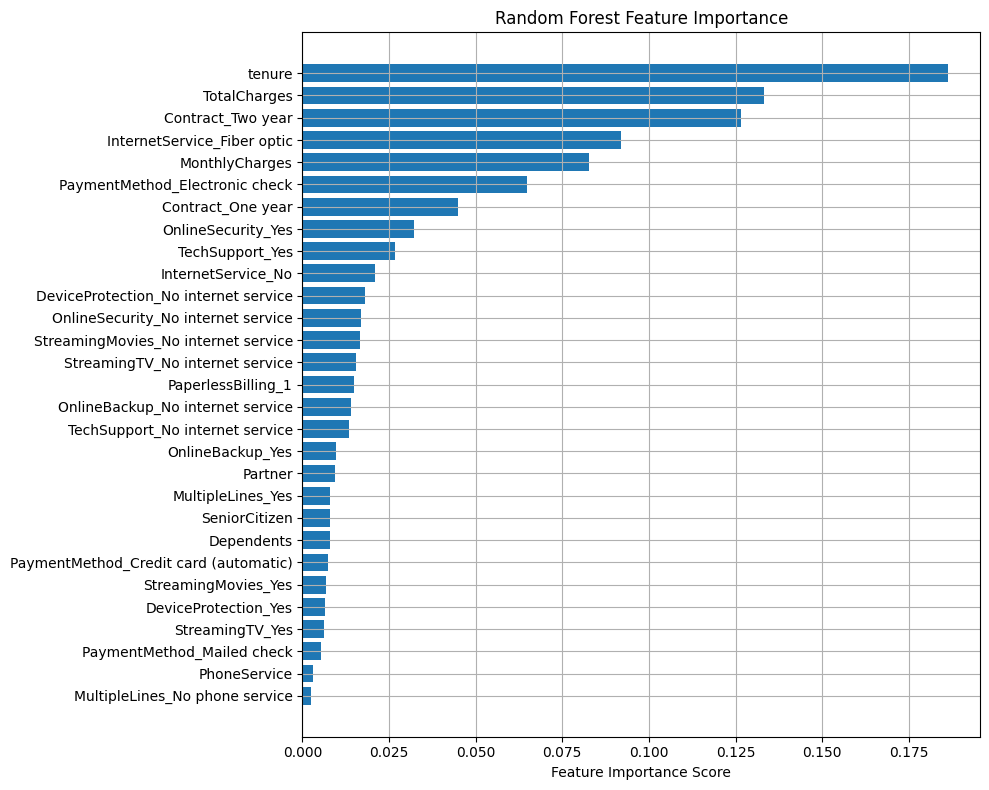

In [113]:
# 1. Extract feature importances
importances = rf_model.feature_importances_

# 2. Match them to column names
features = X_train.columns

# 3. Create a DataFrame for easy sorting and plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by="Importance", ascending=True)

# 4. Plot it
import matplotlib.pyplot as plt

ml.figure(figsize=(10, 8))
ml.barh(importance_df['Feature'], importance_df['Importance'])
ml.xlabel("Feature Importance Score")
ml.title("Random Forest Feature Importance")
ml.grid(True)
ml.tight_layout()
ml.savefig("rf_feature_importance.png", dpi=300)
ml.show()


### 🔍 Feature Importance – Random Forest

We used Random Forest's built-in feature importance to identify the top drivers of churn:

- **tenure**: Most powerful predictor — new customers are more likely to leave
- **TotalCharges**: Low-spending customers tend to churn
- **Contract_Two year**: Long-term contracts reduce churn probability
- **InternetService_Fiber optic**: May be linked with dissatisfaction or cost
- **MonthlyCharges**: High bills could trigger churn

Features with very low importance (like `PhoneService`, `MultipleLines`, `StreamingTV_Yes`) had minimal predictive power.

These insights help the business understand customer behavior and can guide **retention strategies**.


# 📦 Project Wrap-Up: Telco Customer Churn Prediction

After spending considerable time on this project, I’m wrapping it up with a deep understanding of not just the model outputs, but also **how and why** customers churn. This was more than just a machine learning exercise — it was a complete data science lifecycle experience, from raw data to insights and action.

---

## ✅ What I Did

🔹 I started by exploring the **Telco Customer Churn dataset** from Kaggle.  
🔹 The dataset had no missing/null values — however, `TotalCharges` had some values as strings, so I cleaned and converted it to numeric.

🔹 I then did **extensive preprocessing**:
- Binary encoded `Yes/No` columns
- Applied **One-Hot Encoding** to multi-class categorical features
- Dropped irrelevant features like `customerID` and `gender` based on insight and balance

🔹 I visualized churn distribution using **Seaborn**:
- Compared churn by gender, contract type, payment method, and more
- Learned valuable business-level insights from visualizations before modeling

---

## 🧠 Modeling Journey

I trained two models:

### 1. **Logistic Regression**:
- Simple, interpretable, and great as a baseline
- Achieved **80% accuracy**, with decent precision and recall
- Created an ROC curve to evaluate classification performance (AUC = 0.84)

### 2. **Random Forest Classifier**:
- A more complex ensemble model
- After tuning, also achieved **80% accuracy**
- AUC score slightly improved to **0.84**
- Gave me a ranked list of **feature importances**, which was a goldmine of insight

---

## 💡 Key Takeaways

- **Tenure** was the top predictor of churn: newer customers are more likely to leave.
- Customers on **long-term contracts** tend to stay.
- High **monthly charges** and **low total charges** indicate a higher churn risk.
- Not all features matter: I found that columns like `PhoneService`, `MultipleLines`, and some streaming service flags had minimal impact.

---

## 📊 Final Thoughts

This wasn’t just about model accuracy — it was about understanding **why** customers leave, **what drives loyalty**, and **how a company could act** on this data.

I now feel confident in:
- End-to-end data preparation
- Feature encoding strategies
- Model selection and evaluation
- Visual storytelling for business stakeholders

---

I plan to revisit this project later and possibly:
- Add **SHAP explanations** for per-customer churn drivers
- Integrate with a web dashboard for interactive insights
- Try **XGBoost** or **Neural Networks** for further optimization

Thanks for following my journey — and more projects are on the way! 🚀  


In [114]:
import nbformat
from nbconvert import HTMLExporter
from traitlets.config import Config

In [115]:
nb = nbformat.read("customer_churn.ipynb", as_version=4)

c = Config()
# Keep code + markdown + outputs
c.HTMLExporter.exclude_input = False
c.HTMLExporter.exclude_output = False

exporter = HTMLExporter(config=c)
body, _ = exporter.from_notebook_node(nb)

with open("customer_churn.html", "w", encoding="utf-8") as f:
    f.write(body)

print("Done -> YourNotebook.html")

Done -> YourNotebook.html


### Deployment
I will use joblib library for exporting my trained model as .joblib file so later i can access it and use it. I will use FastAPI for making it and further

In [116]:
import joblib as jb

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1133,0,0,1,2,1,19.25,48.35,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,True
6755,0,0,0,42,1,79.90,3313.40,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3739,0,0,0,24,1,24.60,592.65,False,True,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,True,False
2807,0,0,1,7,1,19.45,136.75,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,True
4260,0,1,1,42,1,73.15,3088.25,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,True,False,False,False,True,False
